In [1]:
import torch
import sys
import os 
sys.path.append(os.path.abspath('../..'))

from data import PVWeatherGenerator

In [2]:
# data parameters
DAY_INIT = 0
DAY_MIN = 8
DAY_MAX = 16
N_DAYS = 365
MINUTE_INTERVAL = 5
DAILY_DATA_POINTS = (DAY_MAX - DAY_MIN) * 60 // MINUTE_INTERVAL
N_DAYS_FOLD = 8
N_SYSTEMS = 10
CIRCLE_COORDS = (53.5, -3)
RADIUS = 0.4


In [3]:
generator = PVWeatherGenerator(
    coords=CIRCLE_COORDS,
    radius=RADIUS,
    day_init=DAY_INIT,
    n_systems=N_SYSTEMS,
    n_days=N_DAYS,
    minute_interval=MINUTE_INTERVAL,
)

==> Loading data
==> Loaded data in: 0 m : 14 sec



In [4]:
df = generator.df

In [5]:
systems_interval = int(DAILY_DATA_POINTS * N_DAYS_FOLD * N_SYSTEMS)
individual_interval = int(DAILY_DATA_POINTS * N_DAYS_FOLD)

In [6]:
systems_interval, individual_interval

(7680, 768)

In [7]:
from data import SystemLoader

In [8]:
X = df[['global_rad:W', 'diffuse_rad:W',
        'effective_cloud_cover:octas',
        'relative_humidity_2m:p', 't_2m:C',
        'wind_speed_10m:ms', 'latitude', 'longitude']]
y = df['PV']
loader = SystemLoader(X, y, train_interval=individual_interval)


In [9]:
# number of points for each individual system
print(f'Points per system: {loader.tasks[loader.tasks == 0].shape[0]}')
# total number of points
print(f'Total points: {loader.tasks.shape[0]}')

Points per system: 35295
Total points: 352950


start index: 15360 | end index: 16128
torch.Size([6730, 8]) torch.Size([6730]) torch.Size([240, 8]) torch.Size([240]) torch.Size([6730]) torch.Size([240])
673 24
673 24
673 24
673 24
673 24
673 24
673 24
673 24
673 24
673 24
start index: 16128 | end index: 16896


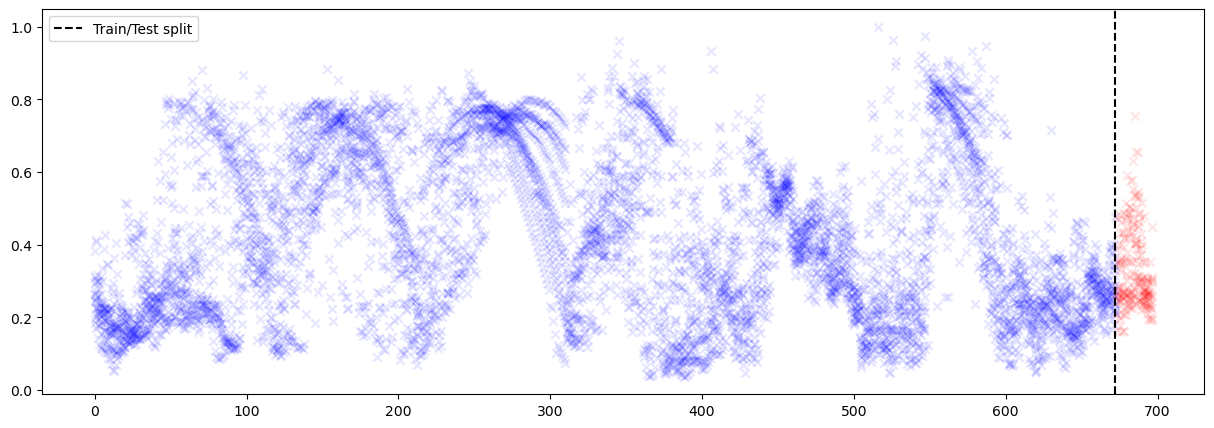

In [30]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

print(f"start index: {loader.start} | end index: {loader.end}")
for X_tr, Y_tr, X_te, Y_te, T_tr, T_te in loader:
    # concatenated systems are in X, Y, T
    # X is the input data, Y is the output data, T is the 
    # which are split into train and test data
    # if you want to do it by individual systems:
    print(X_tr.shape, Y_tr.shape, X_te.shape, Y_te.shape, T_tr.shape, T_te.shape)

    for i in range(loader.n_systems):
        x_tr, y_tr, x_te, y_te = loader.train_test_split_individual(i)
        n_tr, n_te = x_tr.shape[0], x_te.shape[0]
        t_tr, t_te = torch.arange(n_tr), torch.arange(n_tr, n_tr+n_te)
        print(len(t_tr), len(t_te))

        ax.scatter(t_tr, y_tr, color='b', alpha=0.1, marker='x')
        ax.scatter(t_te, y_te, color='r', alpha=0.1, marker='x')
    
    ax.axvline(t_tr.max(), color='k', linestyle='--',label='Train/Test split')
    ax.legend()
       
        
    # updated slicing
    print(f"start index: {loader.start} | end index: {loader.end}")
    break

    
    